# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import time
from timeit import default_timer as timer
import json
import os
import re
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions  = pd.read_table('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [187]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
error_list = []
df_list = []
start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # to see how many favorite the tweets had
        retweets = tweet['retweet_count'] # for counting the retweets
        user_followers = tweet['user']['followers_count'] # to see how many followers the user had
        user_favourites = tweet['user']['favourites_count'] # to see how many favorites the user had
        date_time = tweet['created_at'] # to see the datetime of tweet
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'co

In [6]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [4]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34098,7066,9207996,146963,2017-08-01 16:23:56
1,892177421306343426,29587,5341,9207996,146963,2017-08-01 00:17:27
2,891815181378084864,22284,3510,9207996,146963,2017-07-31 00:18:03
3,891689557279858688,37264,7279,9207996,146963,2017-07-30 15:58:51
4,891327558926688256,35578,7810,9208436,146963,2017-07-29 16:00:24
5,891087950875897856,17973,2622,9207996,146963,2017-07-29 00:08:17
6,890971913173991426,10462,1682,9207996,146963,2017-07-28 16:27:12
7,890729181411237888,57304,15887,9207996,146963,2017-07-28 00:22:40
8,890609185150312448,24739,3654,9207996,146963,2017-07-27 16:25:51
9,890240255349198849,28217,6147,9207996,146963,2017-07-26 15:59:51


## Assessing Data

In [5]:
twitter_archive.info()
twitter_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
image_predictions.info()
image_predictions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
tweet_data.info()
tweet_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 6 columns):
tweet_id           2326 non-null int64
favorites          2326 non-null int64
retweets           2326 non-null int64
user_followers     2326 non-null int64
user_favourites    2326 non-null int64
date_time          2326 non-null object
dtypes: int64(5), object(1)
memory usage: 109.1+ KB


,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34098,7066,9207996,146963,2017-08-01 16:23:56
1,892177421306343426,29587,5341,9207996,146963,2017-08-01 00:17:27
2,891815181378084864,22284,3510,9207996,146963,2017-07-31 00:18:03
3,891689557279858688,37264,7279,9207996,146963,2017-07-30 15:58:51
4,891327558926688256,35578,7810,9208436,146963,2017-07-29 16:00:24


### Quality issues
1. retweeted_status_timestamp, timestamp should be datetime instead of object (string). (twitter_archive)

2. tweet_id should be object(string) (twitter_archive)

3. We only want original ratings "no retweets" those ones have image. (twitter_archive)

4. Change p1 to Prediction1 and other columns that is related to the prediction such as (p1_conf, p1_dog etc...) to (Prediction_conf etc..)

5. The ratings are not extracted correctly especially decimals

6. The name column has many invalid values like , a, an, the

7. Rating data can't be compare since the demoninator are not the same.

8. Change tweet_id to an object datatype

### Tidiness issues
1. the dog stage has 4 stages

2. Combine the datasets together.

## Cleaning Data

In [8]:
# Make copies of original pieces of data
twitter_archive_cleaned = twitter_archive.copy()
image_predictions_cleaned = image_predictions.copy()
tweet_data_cleaned = tweet_data.copy()

### Issue: We only want original ratings "no retweets" those ones have image

#### Define: clean the retweets of the df

#### Code

In [9]:
twitter_archive_cleaned = twitter_archive_cleaned[pd.isnull(twitter_archive_cleaned.retweeted_status_id)]
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_id', 1)
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_user_id', 1)
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_timestamp', 1)

#### Test

In [10]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue Datatypes:

#### Define: retweeted_status_timestamp, timestamp should be datetime instead of object (string) and tweet_id should be object(string)

#### Code

In [11]:
twitter_archive_cleaned['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_cleaned.timestamp)
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned.timestamp)
twitter_archive_cleaned['tweet_id'] = twitter_archive_cleaned['tweet_id'].astype('str')

#### Test

In [12]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweeted_status_timestamp    2175 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 271.9+ KB


### Issue Columns Names:

#### Define: Change p1 to Prediction1 and the same to other columns.

#### Code

In [13]:
image_predictions_cleaned.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)
image_predictions_cleaned.rename(columns={'p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog'}, inplace=True)
image_predictions_cleaned.rename(columns={'p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog'}, inplace=True)
image_predictions_cleaned.rename(columns={'p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

#### Test

In [14]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null object
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null object
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue Datatype on image_predictions df:

#### Define: Change tweet_id to an object datatype

#### Code

In [15]:
image_predictions_cleaned['tweet_id'] = image_predictions_cleaned['tweet_id'].astype('str')
tweet_data_cleaned['tweet_id'] = tweet_data_cleaned['tweet_id'].astype('str')

#### Test

In [16]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null object
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null object
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue The name column has many invalid values like , a, an, the

#### Define: Rename invalid values  from name column, subtitute for 'None'

#### Code

In [17]:
twitter_archive_cleaned.name =  twitter_archive_cleaned.name.str.replace('^[a-z]+', 'None')

In [18]:
twitter_archive_cleaned['name'].value_counts()

None            784
Lucy             11
Charlie          11
Cooper           10
Oliver           10
Tucker            9
Penny             9
Lola              8
Winston           8
Sadie             8
Toby              7
Daisy             7
Bo                6
Stanley           6
Jax               6
Bella             6
Bailey            6
Koda              6
Oscar             6
Scout             5
Rusty             5
Bentley           5
Chester           5
Louis             5
Milo              5
Leo               5
Dave              5
Buddy             5
Oakley            4
Reggie            4
               ... 
Lilly             1
Molly             1
Dallas            1
Dido              1
Murphy            1
Bonaparte         1
Jennifur          1
Kramer            1
Pip               1
Jim               1
Antony            1
Cleopatricia      1
Billy             1
Halo              1
Jaycob            1
Rodney            1
Lambeau           1
Pubert            1
Alf               1


### Issue Rating data:

#### Define: Divide rating numerator by rating denominator


#### Code


In [19]:
twitter_archive_cleaned['rating_numerator'] = twitter_archive_cleaned['rating_numerator'].astype(float)
twitter_archive_cleaned['rating_denominator'] = twitter_archive_cleaned['rating_denominator'].astype(float)

In [20]:
twitter_archive_cleaned[twitter_archive_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [21]:
# Loop to consider de decimal on numerator

#Setting the aux list
rate_dec_txt = []
rate_dec_index = []
rate_dec = []

#looping through the text cells to find the decimal
for i, text in twitter_archive_cleaned['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        rate_dec_txt.append(text) #all text of the tweet
        rate_dec_index.append(i) #same index of the df
        rate_dec.append(re.search('\d+\.\d+', text).group()) #saving numerator with decimal on the list
        

#Substituting numerator for float values with decimal
twitter_archive_cleaned.loc[rate_dec_index[0],'rating_numerator'] = float(rate_dec[0]) 
twitter_archive_cleaned.loc[rate_dec_index[1],'rating_numerator'] = float(rate_dec[1])
twitter_archive_cleaned.loc[rate_dec_index[2],'rating_numerator'] = float(rate_dec[2])
twitter_archive_cleaned.loc[rate_dec_index[3],'rating_numerator'] = float(rate_dec[3])

In [22]:
twitter_archive_cleaned[twitter_archive_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,26.00


In [23]:
twitter_archive_cleaned['rating'] = twitter_archive_cleaned['rating_numerator'] / twitter_archive_cleaned['rating_denominator']

#### Teste


In [24]:
twitter_archive_cleaned.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweeted_status_timestamp,rating
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,https://twitter.com/dog_rates/status/669375718...,6.0,10.0,Billl,None,None,None,None,2015-11-25 04:43:02,0.600000
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,https://twitter.com/dog_rates/status/672068090...,7.0,10.0,Gizmo,None,None,None,None,2015-12-02 15:01:33,0.700000
1874,675135153782571009,NaN,NaN,2015-12-11 02:08:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He got locked outside. Damn it...,https://twitter.com/dog_rates/status/675135153...,5.0,10.0,Steven,None,None,None,None,2015-12-11 02:08:58,0.500000
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,https://twitter.com/dog_rates/status/832273440...,14.0,10.0,Smiley,doggo,None,None,None,2017-02-16 17:00:25,1.400000
362,829449946868879360,NaN,NaN,2017-02-08 22:00:52,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,https://twitter.com/dog_rates/status/829449946...,11.0,10.0,None,doggo,None,None,None,2017-02-08 22:00:52,1.100000
445,819227688460238848,NaN,NaN,2017-01-11 17:01:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,https://twitter.com/dog_rates/status/819227688...,12.0,10.0,Finn,None,None,None,None,2017-01-11 17:01:16,1.200000
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,https://twitter.com/dog_rates/status/841314665...,13.0,10.0,Max,None,None,None,None,2017-03-13 15:47:01,1.300000
1795,677314812125323265,NaN,NaN,2015-12-17 02:30:09,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10.0,10.0,Tassy,None,None,None,None,2015-12-17 02:30:09,1.000000
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8.0,10.0,None,None,None,None,None,2015-11-16 01:01:59,0.800000
2317,666644823164719104,NaN,NaN,2015-11-17 15:51:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9.0,10.0,Jimothy,None,None,None,None,2015-11-17 15:51:26,0.900000


### Tidiness Datatype on image_predictions df:

#### Define: the dog stage has 4 stages.



#### Code

In [25]:
twitter_archive_cleaned.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})


,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [26]:
twitter_archive_cleaned.doggo.replace('None', 'None', inplace=True) 
twitter_archive_cleaned.doggo.replace(np.NaN, 'None', inplace=True)
twitter_archive_cleaned.floofer.replace('None', 'None', inplace=True) 
twitter_archive_cleaned.floofer.replace(np.NaN, 'None', inplace=True)
twitter_archive_cleaned.pupper.replace('None', 'None', inplace=True) 
twitter_archive_cleaned.pupper.replace(np.NaN, 'None', inplace=True)
twitter_archive_cleaned.puppo.replace('None', 'None', inplace=True) 
twitter_archive_cleaned.puppo.replace(np.NaN, 'None', inplace=True)

In [27]:
twitter_archive_cleaned['dogtype'] = twitter_archive_cleaned.doggo + twitter_archive_cleaned.floofer + twitter_archive_cleaned.pupper + twitter_archive_cleaned.puppo
twitter_archive_cleaned.loc[twitter_archive_cleaned.dogtype == 'doggopupper', 'dog_type'] = 'doggo, pupper'
twitter_archive_cleaned.loc[twitter_archive_cleaned.dogtype == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
twitter_archive_cleaned.loc[twitter_archive_cleaned.dogtype == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

In [28]:
twitter_archive_cleaned.dogtype.value_counts()


NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dogtype, dtype: int64

In [29]:
twitter_archive_cleaned.dogtype.unique()


array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [30]:
for idx, row in twitter_archive_cleaned.iterrows():
    if ('doggoNoneNoneNone' in row['dogtype']):
        twitter_archive_cleaned.loc[idx, 'dog_type'] = 'doggo'
    elif ('NoneNoneNonepuppo' in row['dogtype']):
        twitter_archive_cleaned.loc[idx, 'dog_type'] = 'puppo'
    elif ('NoneNonepupperNone' in row['dogtype']):
        twitter_archive_cleaned.loc[idx, 'dog_type'] = 'pupper'
    elif ('NoneflooferNoneNone' in row['dogtype']):
        twitter_archive_cleaned.loc[idx, 'dog_type'] = 'floofer'
    elif ('NoneNoneNoneNone' in row['dogtype']):
        twitter_archive_cleaned.loc[idx, 'dog_type'] = None
    else:
        twitter_archive_cleaned.loc[idx, 'dog_type'] = 'multiple'
twitter_archive_cleaned.head()  

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweeted_status_timestamp,rating,dogtype,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,2017-08-01 16:23:56,1.3,NoneNoneNoneNone,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,2017-08-01 00:17:27,1.3,NoneNoneNoneNone,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,2017-07-31 00:18:03,1.2,NoneNoneNoneNone,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,2017-07-30 15:58:51,1.3,NoneNoneNoneNone,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,2017-07-29 16:00:24,1.2,NoneNoneNoneNone,None


In [31]:
twitter_archive_cleaned.dog_type.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dog_type, dtype: int64

In [32]:
twitter_archive_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo', 'dogtype'], axis=1, inplace=True)

#### Test

In [33]:
twitter_archive_cleaned.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweeted_status_timestamp,rating,dog_type
1221,714485234495041536,NaN,NaN,2016-03-28 16:12:09,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Blitz. He screams. 10/10 (vid by @yeaa...,https://vine.co/v/iDrOvVqq0A6,10.0,10.0,Blitz,2016-03-28 16:12:09,1.000000,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,10.0,10.0,Raymond,2015-12-07 03:34:14,1.000000,pupper
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,https://twitter.com/ktla/status/83894871422799...,13.0,10.0,None,2017-03-07 03:22:35,1.300000,None
2171,669328503091937280,NaN,NaN,2015-11-25 01:35:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,https://twitter.com/dog_rates/status/669328503...,12.0,10.0,Kirk,2015-11-25 01:35:25,1.200000,None
1896,674739953134403584,NaN,NaN,2015-12-09 23:58:35,"<a href=""http://twitter.com/download/iphone"" r...","""🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶""\n11/10...",https://twitter.com/dog_rates/status/674739953...,11.0,10.0,None,2015-12-09 23:58:35,1.100000,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,https://twitter.com/bvuepd/status/804417859124...,13.0,10.0,None,2016-12-02 00:02:45,1.300000,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11.0,15.0,None,2017-02-16 04:45:50,0.733333,None
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,https://twitter.com/dog_rates/status/793210959...,10.0,10.0,Maude,2016-10-31 22:00:04,1.000000,None
1638,684188786104872960,NaN,NaN,2016-01-05 01:44:52,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/684188786...,10.0,10.0,None,2016-01-05 01:44:52,1.000000,None
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,https://twitter.com/dog_rates/status/703268521...,12.0,10.0,None,2016-02-26 17:20:56,1.200000,pupper


In [34]:
twitter_archive_cleaned.dog_type.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dog_type, dtype: int64

### Tidiness Combine datasets:

#### Define:Combine the datasets together.

#### Code

In [35]:
twitter_data = pd.merge(left=twitter_archive_cleaned,
                                 right=tweet_data_cleaned, left_on='tweet_id', right_on='tweet_id', how='inner')

#### Test

In [36]:
twitter_data = twitter_data.merge(image_predictions_cleaned, on='tweet_id', how='inner')
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 29 columns):
tweet_id                      1985 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1985 non-null datetime64[ns]
source                        1985 non-null object
text                          1985 non-null object
expanded_urls                 1985 non-null object
rating_numerator              1985 non-null float64
rating_denominator            1985 non-null float64
name                          1985 non-null object
retweeted_status_timestamp    1985 non-null datetime64[ns]
rating                        1985 non-null float64
dog_type                      305 non-null object
favorites                     1985 non-null int64
retweets                      1985 non-null int64
user_followers                1985 non-null int64
user_favourites               1985 non-null int64
date_time     

## Storing Data

In [37]:
twitter_data.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data

In [38]:
df = pd.read_csv('twitter_archive_master.csv')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 29 columns):
tweet_id                      1985 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1985 non-null object
source                        1985 non-null object
text                          1985 non-null object
expanded_urls                 1985 non-null object
rating_numerator              1985 non-null float64
rating_denominator            1985 non-null float64
name                          1985 non-null object
retweeted_status_timestamp    1985 non-null object
rating                        1985 non-null float64
dog_type                      305 non-null object
favorites                     1985 non-null int64
retweets                      1985 non-null int64
user_followers                1985 non-null int64
user_favourites               1985 non-null int64
date_time                     1

In [39]:
df['Prediction1'].value_counts()

golden_retriever             139
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           53
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
Maltese_dog                   18
Staffordshire_bullterrier     18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
beagle                        17
Rottweiler                    17
Cardigan                      17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
Lakeland_terrier              16
web_site                      15
          

Text(0.5,1,'scatter plot of retweets and favorites')

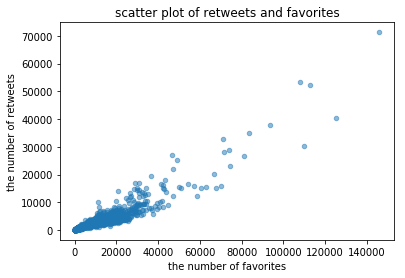

In [40]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('the number of favorites')
plt.ylabel('the number of retweets')
plt.title('scatter plot of retweets and favorites')

In [41]:
df['rating'].value_counts()

1.200000      452
1.000000      419
1.100000      402
1.300000      257
0.900000      151
0.800000       95
0.700000       50
1.400000       35
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
2.600000        1
1.127000        1
3.428571        1
0.636364        1
1.350000        1
0.818182        1
0.975000        1
42.000000       1
177.600000      1
Name: rating, dtype: int64

In [42]:
df.name.value_counts()


None            643
Charlie          10
Oliver           10
Cooper           10
Tucker            9
Penny             9
Lucy              9
Sadie             8
Winston           8
Toby              7
Daisy             7
Lola              7
Koda              6
Jax               6
Bella             6
Bo                6
Stanley           6
Milo              5
Louis             5
Buddy             5
Chester           5
Bailey            5
Dave              5
Leo               5
Oscar             5
Scout             5
Rusty             5
George            4
Larry             4
Gus               4
               ... 
Bloop             1
Mauve             1
Bauer             1
Hercules          1
Lilly             1
Fizz              1
Jangle            1
Cheryl            1
Jaycob            1
Tove              1
Ito               1
Jennifur          1
Pip               1
Jim               1
Antony            1
Cleopatricia      1
Billy             1
Halo              1
Rodney            1


### Insights:
1. Golden Retriver are the most popular dog on our data set

2. There are a corelaction between the favorites and retweet actions

3. The rate 1.2 are the most frequent been seen 976 times on our data set. 

4. The name Copper, Oliver e Charlie repeat 10 times each being the most repeated names followed by Penny, Tucker and Lucy with 9 times . 

### Visualization

In [43]:
import seaborn as sns
% matplotlib inline

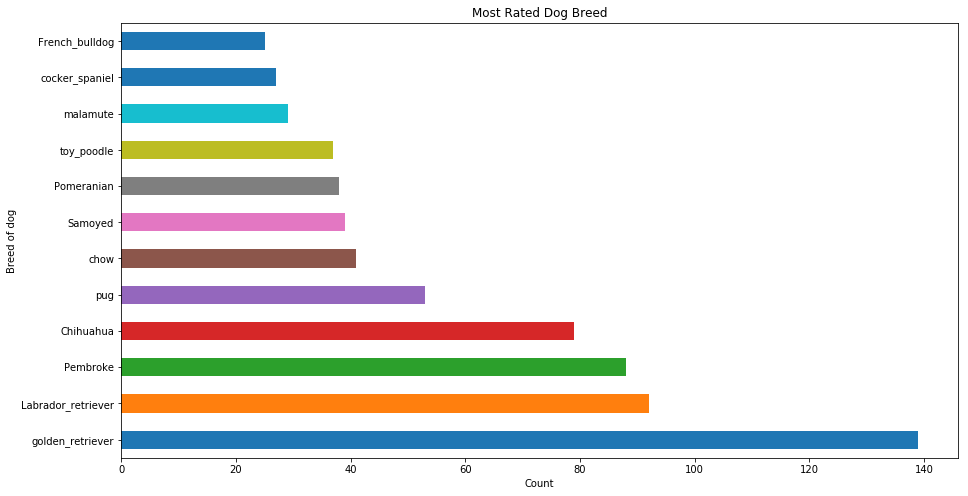

In [44]:
dog_breed = df.groupby('Prediction1').filter(lambda x: len(x) >= 25)
dog_breed['Prediction1'].value_counts().plot(kind = 'barh', figsize=(15,8))
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

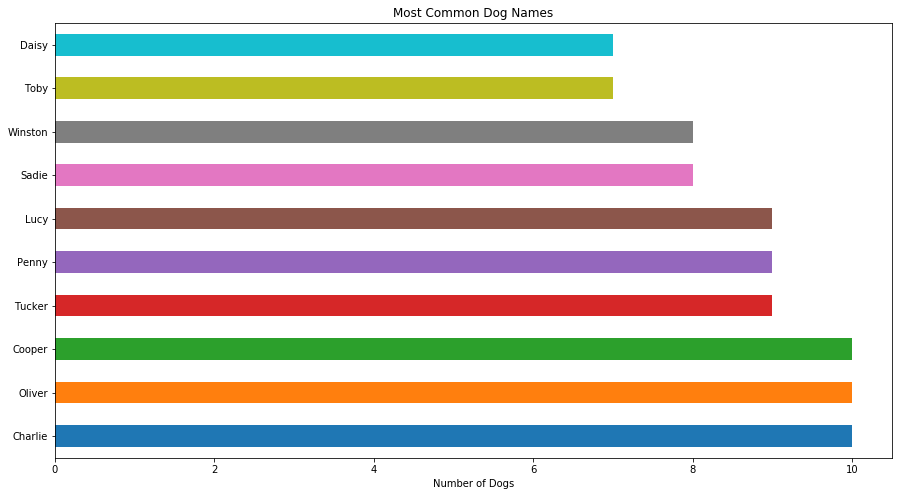

In [45]:
df.name.value_counts()[1:11].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");
